# a.iris資集介紹

## 匯入模組

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.utils import np_utils
np.random.seed(10)
import matplotlib.pyplot as plt
import os
print(os.listdir('./input'))
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder #labelEncoder
from sklearn.preprocessing import OneHotEncoder #one-hot-code
from sklearn.model_selection import train_test_split #將X與Y隨機切成訓練與測試

Using TensorFlow backend.


['Iris.csv']


## 讀取Iris.csv資料

In [2]:
all_df = pd.read_csv('./input/Iris.csv')

In [3]:
all_df

,petal_length,petal_width,sepal_length,sepal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 選取欄位到dataframe

In [4]:
cols=['petal_length','petal_width','sepal_length','sepal_width','label']
all_df=all_df[cols]

In [5]:
all_df

,petal_length,petal_width,sepal_length,sepal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
#df.describe()

# b.資料預處理

In [7]:
all_df['label']=all_df['label'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}).astype(int) #先將label轉成int

In [8]:
df=all_df
df

,petal_length,petal_width,sepal_length,sepal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
Label = df.values[:,4]    #類別
Features = df.values[:,:4] #前4筆是特徵

In [10]:
x_train, x_test, y_train, y_test = train_test_split(Features, Label, test_size=0.3) #分割資料

In [11]:
y_train_onehot=tf.contrib.keras.utils.to_categorical(y_train) #將y訓練資料轉成one-hot-code

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [12]:
y_test_onehot=tf.contrib.keras.utils.to_categorical(y_test) #將y測試資料轉成one-hot-code

In [13]:
print('total:', len(df),
      'train:', len(x_train),
      'test:', len(x_test))

total: 150 train: 105 test: 45


## 將label轉成one-hot-code

data_onehot = pd.get_dummies(df,columns=['label'])
pd.DataFrame(data_onehot)

## 將dataframe轉換成array

ndarray = data_onehot.values #dataframe轉成array

ndarray.shape #查看ndarray的shape

ndarray.shape #查看ndarray的shape

## 將ndarray特徵欄位進行標準化

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1)) #建立MinMaxScaler標準化刻度minmax_scale

scaledFeatures = minmax_scale.fit_transform(Features) #使用minmax_scale.fit_tranform進行標準化

scaledFeatures[:2] #查看標準化後的特徵欄位前2筆

## 建立PreprocessData函數進行資料之預處理

def PreprocessData(raw_df):
    data_onehot = pd.get_dummies(df)
    
    ndarray = data_onehot.values
    Label = df.values[:,4]    
    Features = df.values[:,:4]
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures = minmax_scale.fit_transform(Features)
    
    return scaledFeatures, Label

train_Features,train_Label = PreprocessData(train_df) #將訓練資料與測試資料做預處理
test_Features, test_Label = PreprocessData(test_df)

train_Features,train_Label = PreprocessData(train_df) #將訓練資料與測試資料做預處理
test_Features, test_Label = PreprocessData(test_df)

train_Features[:2] #查看資料預處理後，訓練資料特徵欄位

test_Features[:2] #查看資料預處理後，訓練資料標籤欄位

# c.建立模型

## 匯入模組

In [14]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [15]:
model = Sequential() #建立keras Sequential模型

In [16]:
model.add(Dense(units=10, input_dim=4,        #建立輸入層與隱藏層1，輸入層4個特徵神經元，隱藏層1有10個神經元
                kernel_initializer='uniform',
                activation='relu'))

In [17]:
model.add(Dense(units=10,                     #建立隱藏層2，隱藏層2有10個神經元
                kernel_initializer='uniform',
                activation='relu'))

In [18]:
model.add(Dense(units=3,                      #建立輸出層，輸出層3個品種
                kernel_initializer='uniform',
                activation='softmax'))

In [19]:
print(model.summary()) #查看參數

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None


# d.訓練模型

In [20]:
model.compile(loss='binary_crossentropy',              #定義訓練方式
              optimizer='adam', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [21]:
train_history = model.fit(x=x_train,
                          y=y_train_onehot,
                          validation_split=0.1,    #90%作為訓練資料，10%作為測試資料
                          epochs=120,               #執行120次訓練週期
                          batch_size=40,verbose=2) #每一批次40筆資料




Train on 94 samples, validate on 11 samples
Epoch 1/120





 - 0s - loss: 0.6366 - acc: 0.6667 - val_loss: 0.6365 - val_acc: 0.6667
Epoch 2/120
 - 0s - loss: 0.6365 - acc: 0.6667 - val_loss: 0.6364 - val_acc: 0.6667
Epoch 3/120
 - 0s - loss: 0.6365 - acc: 0.6667 - val_loss: 0.6364 - val_acc: 0.6667
Epoch 4/120
 - 0s - loss: 0.6364 - acc: 0.6667 - val_loss: 0.6364 - val_acc: 0.6667
Epoch 5/120
 - 0s - loss: 0.6364 - acc: 0.6667 - val_loss: 0.6364 - val_acc: 0.6667
Epoch 6/120
 - 0s - loss: 0.6364 - acc: 0.6667 - val_loss: 0.6363 - val_acc: 0.6667
Epoch 7/120
 - 0s - loss: 0.6363 - acc: 0.6667 - val_loss: 0.6362 - val_acc: 0.6667
Epoch 8/120
 - 0s - loss: 0.6362 - acc: 0.6667 - val_loss: 0.6361 - val_acc: 0.6667
Epoch 9/120
 - 0s - loss: 0.6361 - acc: 0.6667 - val_loss: 0.6360 - val_acc: 0.6667
Epoch 10/120
 - 0s - loss: 0.6360 - acc: 0.6667 - val_loss: 0.6357 - val_acc: 0.6667
Epoch 11/120
 - 0s - loss: 0.6357 - acc: 0.6667 - val_loss: 0.6354 - val_acc: 0.6667
Epoch 12/120
 - 0s - l

Epoch 78/120
 - 0s - loss: 0.3385 - acc: 0.8156 - val_loss: 0.2663 - val_acc: 0.9091
Epoch 79/120
 - 0s - loss: 0.3344 - acc: 0.8191 - val_loss: 0.2646 - val_acc: 0.9091
Epoch 80/120
 - 0s - loss: 0.3313 - acc: 0.8298 - val_loss: 0.2632 - val_acc: 0.9091
Epoch 81/120
 - 0s - loss: 0.3281 - acc: 0.8404 - val_loss: 0.2613 - val_acc: 0.9091
Epoch 82/120
 - 0s - loss: 0.3249 - acc: 0.8475 - val_loss: 0.2582 - val_acc: 0.9091
Epoch 83/120
 - 0s - loss: 0.3216 - acc: 0.8475 - val_loss: 0.2552 - val_acc: 0.9091
Epoch 84/120
 - 0s - loss: 0.3184 - acc: 0.8475 - val_loss: 0.2519 - val_acc: 0.9091
Epoch 85/120
 - 0s - loss: 0.3153 - acc: 0.8440 - val_loss: 0.2484 - val_acc: 0.9091
Epoch 86/120
 - 0s - loss: 0.3123 - acc: 0.8369 - val_loss: 0.2459 - val_acc: 0.9091
Epoch 87/120
 - 0s - loss: 0.3095 - acc: 0.8404 - val_loss: 0.2435 - val_acc: 0.9091
Epoch 88/120
 - 0s - loss: 0.3068 - acc: 0.8404 - val_loss: 0.2406 - val_acc: 0.9091
Epoch 89/120
 - 0s - loss: 0.3040 - acc: 0.8475 - val_loss: 0.238

# e.以圖形顯示訓練過程的loss & accuracy

In [22]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

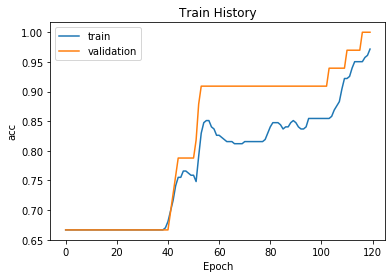

In [23]:
show_train_history(train_history, 'acc', 'val_acc') #畫出accuracy執行結果

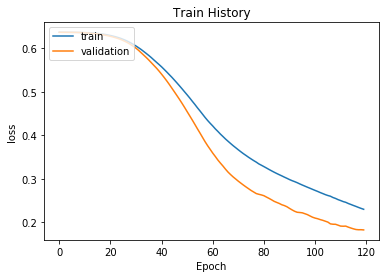

In [24]:
show_train_history(train_history, 'loss', 'val_loss') #畫出loss誤差執行結果

# f.評估模型準確率

In [25]:
scores = model.evaluate(x=x_test, #評估模型準確率
                        y=y_test_onehot)
print('accuracy=', scores[1]) #顯示準確率

45/45 [==============================] - 0s 133us/step
accuracy= 0.9777777777777777
